# Лабораторная работа 5
## Задание 5
### Часть 1

In [1]:
import numpy as np
from numpy.linalg import norm
from numpy import arccos, dot, pi, cross
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
A = 10
q = 0.3
r = 0.5
dist = 3
point_list = np.array

alpha = pi / 3
angle_dist = dist

In [3]:
def plot_circle(x, y, r):
    angles = np.linspace(0, 2*pi, 50)
    x_cir = x + r*np.cos(angles)
    y_cir = y + r*np.sin(angles)
    plt.plot(x_cir, y_cir, 'r')

In [4]:
def poisson_process(lamb, area_size):
    number_block = np.random.poisson(lamb*area_size**2)
    x = np.random.uniform(0, area_size, size=number_block)
    y = np.random.uniform(0, area_size, size=number_block)
    return x, y

In [5]:
def coords_rectangle(x1, y1, x2, y2, angle):
    difference_angle = 2 * pi - angle
    reverse_angle = pi / 2 - difference_angle
    opposite_angle = reverse_angle + pi
    x1_rectangle = x1 + r * np.cos(opposite_angle)
    y1_rectangle = y1 + r * np.sin(opposite_angle)
    x2_rectangle = x1 + r * np.cos(reverse_angle)
    y2_rectangle = y1 + r * np.sin(reverse_angle)
    x3_rectangle = x2 + r * np.cos(reverse_angle)
    y3_rectangle = y2 + r * np.sin(reverse_angle)
    x4_rectangle = x2 + r * np.cos(opposite_angle)
    y4_rectangle = y2 + r * np.sin(opposite_angle)
    
    return x1_rectangle, y1_rectangle, x2_rectangle, y2_rectangle, x3_rectangle, y3_rectangle, x4_rectangle, y4_rectangle

In [6]:
def check_dist(a, b, c):
    ca = (c - a) / norm(c - a)
    ba = (b - a) / norm(b - a)
    cb = (c - b) / norm(c - b)
    ab = (a - b) / norm(a - b)
    
    if arccos(dot(ca, ba)) > 1:
        return norm(c - a)
    if arccos(dot(cb, ab)) > 1:
        return norm(c - b)
    return norm(cross(a - b, a - c)) / norm(b - a)

In [7]:
def check_intersection():
    circle_point  = []
    point1 = []
    point2 = []
    point1.extend([x1, y1])
    point2.extend([x2, y2])
    for i in range(len(x)):
        circle_point.append([x[i], y[i]])
    for i in range(len(x)):
        if (np.round(check_dist(point_list(point1), point_list(point2), point_list(circle_point[i])), 1) <= r):
            return True

In [8]:
def angle_coords(x, y, angle):
    x1 = x + angle_dist * np.cos(angle)
    y1 = y + angle_dist * np.sin(angle)
    x2 = x + angle_dist * np.cos(angle + alpha)
    y2 = y + angle_dist * np.sin(angle + alpha)
    return x1, y1, x2, y2

In [9]:
def dec_to_pol(x, y):
    return np.arctan2(y, x)

In [10]:
def check_vision(x1, y1, ang1_x1, ang1_y1, ang1_x2, ang1_y2, x2, y2, ang2_x1, ang2_y1, ang2_x2, ang2_y2):
    # Находим углы для первой точки
    fi_1 = dec_to_pol(x2-x1, y2-y1) if dec_to_pol(x2-x1, y2-y1) >= 0 else dec_to_pol(x2-x1, y2-y1) + pi*2
    
    ang1_fi_1 = dec_to_pol(ang1_x1-x1, ang1_y1-y1) if dec_to_pol(ang1_x1-x1, ang1_y1-y1) >= 0 else dec_to_pol(ang1_x1-x1, ang1_y1-y1) + pi*2
    
    ang1_fi_2 = dec_to_pol(ang1_x2-x1, ang1_y2-y1) if dec_to_pol(ang1_x2-x1, ang1_y2-y1) >= 0 else dec_to_pol(ang1_x2-x1, ang1_y2-y1) + pi*2
    
    # И для второй точки
    fi_2 = dec_to_pol(x1-x2, y1-y2) if dec_to_pol(x1-x2, y1-y2) >= 0 else dec_to_pol(x1-x2, y1-y2) + pi*2
    
    ang2_fi_1 = dec_to_pol(ang2_x1-x2, ang2_y1-y2) if dec_to_pol(ang2_x1-x2, ang2_y1-y2) >= 0 else dec_to_pol(ang2_x1-x2, ang2_y2-y2) + pi*2
    
    ang2_fi_2 = dec_to_pol(ang2_x2-x2, ang2_y2-y2) if dec_to_pol(ang2_x2-x2, ang2_y2-y2) >= 0 else dec_to_pol(ang2_x2-x2, ang2_y2-y2) + pi*2
    
    if (fi_1 > ang1_fi_1 and fi_1 < ang1_fi_2) and (fi_2 > ang2_fi_1 and fi_2 < ang2_fi_2):
        return True
    else:
        return False

In [11]:
# Задание всех точек
x, y = poisson_process(q, A)
angle = np.random.uniform(0, 2*np.pi)
x1, y1 = np.random.uniform(0, A), np.random.uniform(0, A)
x2 = x1 + dist * np.cos(angle)
y2 = y1 + dist * np.sin(angle)
x1_rect, y1_rect, x2_rect, y2_rect, x3_rect, y3_rect, x4_rect, y4_rect = coords_rectangle(x1,y1,x2,y2,angle)

an1_x1, an1_y1, an1_x2, an1_y2 = angle_coords(x1, y1, np.random.uniform(0, 2*pi))
an2_x1, an2_y1, an2_x2, an2_y2 = angle_coords(x2, y2, np.random.uniform(0, 2*pi))

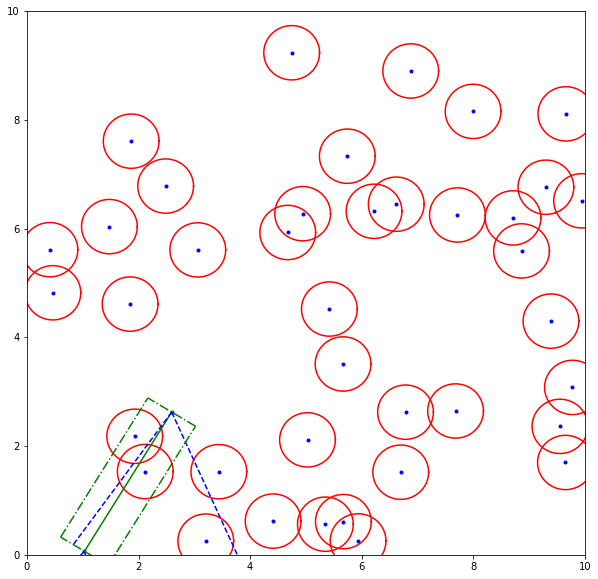

In [12]:
# Построение по точкам
plt.figure(figsize=(10, 10))
plt.plot(x, y, ".b")
for i in range(len(x)):
    plot_circle(x[i], y[i], r)

plt.plot([x1, x2], [y1, y2], '.-g')

plt.plot([x1, an1_x1], [y1, an1_y1], "--b", )
plt.plot([x1, an1_x2], [y1, an1_y2], "--b", )

plt.plot([x2, an2_x1], [y2, an2_y1], "--b", )
plt.plot([x2, an2_x2], [y2, an2_y2], "--b", )
    
plt.plot([x1_rect, x2_rect], [y1_rect, y2_rect], '-.g')
plt.plot([x1_rect, x4_rect], [y1_rect, y4_rect], '-.g')
plt.plot([x2_rect, x3_rect], [y2_rect, y3_rect], '-.g')
plt.plot([x4_rect, x3_rect], [y4_rect, y3_rect], '-.g')
plt.xlim(0, A)
plt.ylim(0, A)
plt.show()

In [13]:
if check_intersection():
    print("Blocked")
else:
    print("Not blocked")

if check_vision(x1, y1, an1_x1, an1_y1, an1_x2, an1_y2, x2, y2, an2_x1, an2_y1, an2_x2, an2_y2):
    print("In vision")
else:
    print("Not in vision")

Blocked
Not in vision


In [14]:
N = 1000

In [18]:
# На основе 1000 реализаций
count_v = 0
count_b = 0
count_bv = 0
for i in range(N):
    x, y = poisson_process(q, A)
    angle = np.random.uniform(0, 2*np.pi)
    # x1,y1 = np.random.uniform(dist, A - dist), np.random.uniform(dist, A - dist)
    x1,y1 = np.random.uniform(0, A), np.random.uniform(0, A)
    x2 = x1 + dist * np.cos(angle)
    y2 = y1 + dist * np.sin(angle)
    an1_x1, an1_y1, an1_x2, an1_y2 = angle_coords(x1, y1, np.random.uniform(0, 2*pi))
    an2_x1, an2_y1, an2_x2, an2_y2 = angle_coords(x2, y2, np.random.uniform(0, 2*pi))
    if check_vision(x1, y1, an1_x1, an1_y1, an1_x2, an1_y2, x2, y2, an2_x1, an2_y1, an2_x2, an2_y2):
        count_v += 1
    if check_intersection():
        count_b += 1
    if check_vision(x1, y1, an1_x1, an1_y1, an1_x2, an1_y2, x2, y2, an2_x1, an2_y1, an2_x2, an2_y2) and not check_intersection():
        count_bv += 1
        
count_b = N - count_b
print("Вероятность прямой видимости: ", count_v / N)
print("Вероятность не блокировки: ", count_b / N)
print("Вероятность области видимости", count_bv / N)

Вероятность прямой видимости:  0.024
Вероятность не блокировки:  0.386
Вероятность области видимости 0.008


In [16]:
# Теоретическая вероятность
S = 2 * r * dist
lmb = q * S
probability_b = np.exp(-lmb)
probability_v = alpha ** 2 / (4 * pi ** 2)
print("Вероятность прямой видимости: ", probability_v)
print("Вероятность не блокировки: ", probability_b)
print("Вероятность области видимости", probability_v * probability_b)

Вероятность прямой видимости:  0.027777777777777773
Вероятность не блокировки:  0.40656965974059917
Вероятность области видимости 0.011293601659461085
